In [2]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_user_id = pd.read_csv('data/df_user_id_v3.csv', index_col=0) # PV기준으로 차상위부터 4개 그룹으로 분류(group column)
df_user_id

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,...,c_category_code,category_code_max,category_code_min,CV,PC,PV,VS,CS,PS,group
0,518827547,1,4,4,3885.56,1,9,1,1,1,...,1,electronics,electronics,400.000000,100.000000,400.000000,1.000000,4.000000,4.000000,1
1,531057019,1,3,3,1414.88,3,7,1,1,1,...,1,electronics,electronics,300.000000,100.000000,300.000000,0.333333,1.000000,1.000000,1
2,567382227,1,2,3,1481.82,2,6,1,1,1,...,1,electronics,electronics,200.000000,150.000000,300.000000,0.500000,1.000000,1.500000,1
3,554826403,1,1,2,1437.75,1,4,1,1,2,...,2,electronics,country_yard,100.000000,200.000000,200.000000,1.000000,1.000000,2.000000,1
4,570809877,1,1,2,2665.34,1,4,1,1,1,...,1,electronics,electronics,100.000000,200.000000,200.000000,1.000000,1.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44025,547556934,675,7,1,1576.62,42,683,17,3,1,...,1,electronics,electronics,1.037037,14.285714,0.148148,16.071429,0.166667,0.023810,4
44026,529230007,1380,6,2,1431.15,68,1388,117,2,1,...,7,appliances,construction,0.434783,33.333333,0.144928,20.294118,0.088235,0.029412,4
44027,512845454,1714,2,2,1693.23,61,1718,72,2,2,...,7,electronics,apparel,0.116686,100.000000,0.116686,28.098361,0.032787,0.032787,4
44028,547316443,867,70,1,1660.27,41,938,26,9,1,...,3,electronics,apparel,8.073818,1.428571,0.115340,21.146341,1.707317,0.024390,4


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_user_id

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,weekday_max,time_max,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,category_code_max,category_code_min,CV,PC,PV,VS,CS,PS,group
0,518827547,1,4,4,3885.56,1,9,1,1,1,Wednesday,9~12,971.390000,971.390000,971.390000,1,971.39,971.39,1,electronics,electronics,400.000000,100.000000,400.000000,1.000000,4.000000,4.000000,1
1,531057019,1,3,3,1414.88,3,7,1,1,1,Sunday,9~12,643.230000,471.626667,471.626667,2,643.23,128.42,1,electronics,electronics,300.000000,100.000000,300.000000,0.333333,1.000000,1.000000,1
2,567382227,1,2,3,1481.82,2,6,1,1,1,Saturday,12~15,493.940000,493.940000,493.940000,1,493.94,493.94,1,electronics,electronics,200.000000,150.000000,300.000000,0.500000,1.000000,1.500000,1
3,554826403,1,1,2,1437.75,1,4,1,1,2,Saturday,15~18,1347.990000,1347.990000,718.875000,2,1347.99,89.76,2,electronics,country_yard,100.000000,200.000000,200.000000,1.000000,1.000000,2.000000,1
4,570809877,1,1,2,2665.34,1,4,1,1,1,Wednesday,3~6,1332.670000,1332.670000,1332.670000,1,1332.67,1332.67,1,electronics,electronics,100.000000,200.000000,200.000000,1.000000,1.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44025,547556934,675,7,1,1576.62,42,683,17,3,1,Saturday,15~18,1337.835481,1497.555714,1576.620000,179,1576.62,1576.62,1,electronics,electronics,1.037037,14.285714,0.148148,16.071429,0.166667,0.023810,4
44026,529230007,1380,6,2,1431.15,68,1388,117,2,1,Tuesday,15~18,217.986486,463.411667,715.575000,718,762.18,668.97,7,appliances,construction,0.434783,33.333333,0.144928,20.294118,0.088235,0.029412,4
44027,512845454,1714,2,2,1693.23,61,1718,72,2,2,Saturday,15~18,887.675443,652.915000,846.615000,519,1351.39,341.84,7,electronics,apparel,0.116686,100.000000,0.116686,28.098361,0.032787,0.032787,4
44028,547316443,867,70,1,1660.27,41,938,26,9,1,Friday,15~18,626.731465,873.482714,1660.270000,191,1660.27,1660.27,3,electronics,apparel,8.073818,1.428571,0.115340,21.146341,1.707317,0.024390,4


# PV(purchas/view) 기준으로 나눈 그룹 들 간의 v_brand(많이 본 brand), c_brand(cart에 담은 brand), p_brand(구매한 brand) 비교

In [11]:
df_group_1 = df_user_id.query("group == 1").mean()  # 그룹 별 평균치를 df_group_1에 저장
df_group_2 = df_user_id.query("group == 2").mean()
df_group_3 = df_user_id.query("group == 3").mean()
df_group_4 = df_user_id.query("group == 4").mean()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15928\1036624211.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_group_1 = df_user_id.query("group == 1").mean()  # 그룹 별 평균치를 df_group_1에 저장
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15928\1036624211.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_group_2 = df_user_id.query("group == 2").mean()
C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15928\1036624211.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it w

In [12]:
df_group_1

user_id                5.475150e+08
view                   1.853557e+01
cart                   9.432361e+00
c_purchase             7.464250e+00
t_purchase             3.873598e+03
user_session_unique    6.246661e+00
number_behavior        3.543218e+01
v_brand                2.797038e+00
c_brand                1.893068e+00
p_brand                1.967021e+00
view_price_avg         7.636024e+02
cart_price_avg         7.602322e+02
purchase_price_avg     7.816962e+02
product_id_unique      6.350777e+00
purchase_price_max     1.024185e+03
purchase_price_min     5.798423e+02
c_category_code        1.273281e+00
CV                     5.437729e+01
PC                              inf
PV                     4.635310e+01
VS                     3.063841e+00
CS                     1.566694e+00
PS                     1.327684e+00
group                  1.000000e+00
dtype: float64

In [13]:
df_total_1 = pd.DataFrame(df_group_1) # 각 그룹들의 변수를 DataFrame화
df_total_2 = pd.DataFrame(df_group_2)
df_total_3 = pd.DataFrame(df_group_3)
df_total_4 = pd.DataFrame(df_group_4)
df_total_1

,0
user_id,5.475150e+08
view,1.853557e+01
cart,9.432361e+00
c_purchase,7.464250e+00
t_purchase,3.873598e+03
user_session_unique,6.246661e+00
number_behavior,3.543218e+01
v_brand,2.797038e+00
c_brand,1.893068e+00
p_brand,1.967021e+00


In [14]:
df_bar = pd.concat([df_total_1, df_total_2, df_total_3, df_total_4], axis=1).T   # 각 그룹들을 한 프레임으로 합쳐 행과 열을 치환
df_bar

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,CV,PC,PV,VS,CS,PS,group
0,5.475150e+08,18.535568,9.432361,7.464250,3873.597897,6.246661,35.432180,2.797038,1.893068,1.967021,763.602419,760.232224,781.696208,6.350777,1024.184652,579.842320,1.273281,54.377287,inf,46.353095,3.063841,1.566694,1.327684,1.0
0,5.428982e+08,34.156432,11.337573,7.452217,3742.323700,8.750091,52.946221,5.375000,2.473746,2.371820,644.487653,688.262088,707.545661,13.791334,989.059095,475.070959,1.614008,34.080815,inf,22.194431,4.127132,1.340210,0.904503,2.0
0,5.397553e+08,56.291568,11.647738,6.343903,3148.374288,10.887788,74.283209,9.056696,2.823460,2.465201,603.110865,689.538726,717.766992,24.935308,1000.635106,482.799301,2.036253,21.711094,inf,11.554923,5.425360,1.095548,0.615768,3.0
0,5.348293e+08,129.600872,10.708965,4.372059,2450.574090,16.110818,144.681897,17.141521,3.021528,2.251976,599.354399,742.609153,824.933577,56.123535,1084.931771,603.540893,2.723045,10.437994,inf,4.205493,8.094669,0.722730,0.312505,4.0


<AxesSubplot: xlabel='group', ylabel='v_brand'>

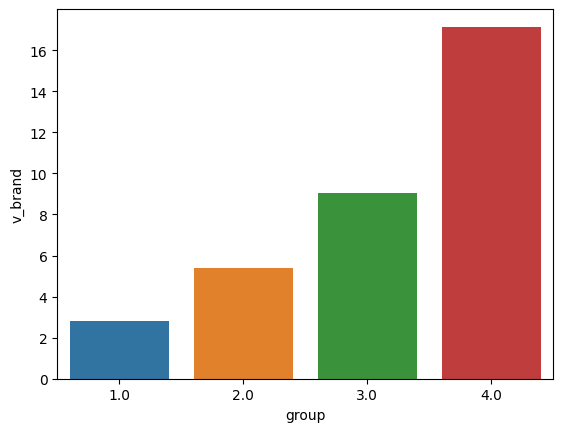

In [15]:
sns.barplot(data = df_bar, x='group', y='v_brand')   

#sns.barplot(data = df_group_2, x= 'v_brand', 'c_brand', 'p_brand', y= 0, order = ['v_brand', 'c_brand', 'p_brand'])
#sns.barplot(data = df_group_3, x= 'v_brand', 'c_brand', 'p_brand', y= 0, order = ['v_brand', 'c_brand', 'p_brand'])
#sns.barplot(data = df_group_4, x= 'v_brand', 'c_brand', 'p_brand', y= 0, order = ['v_brand', 'c_brand', 'p_brand'])


<AxesSubplot: xlabel='group', ylabel='c_brand'>

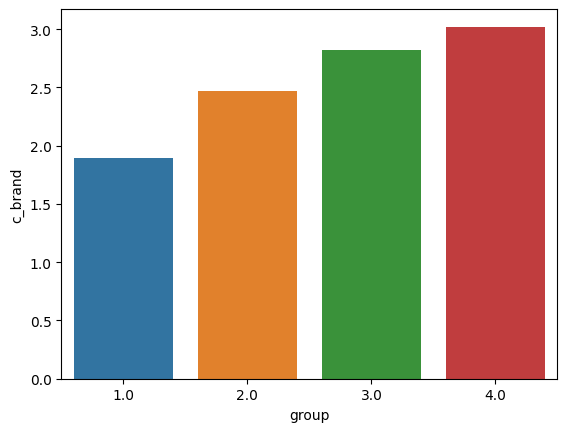

In [16]:
sns.barplot(data = df_bar, x='group', y='c_brand')

<AxesSubplot: xlabel='group', ylabel='p_brand'>

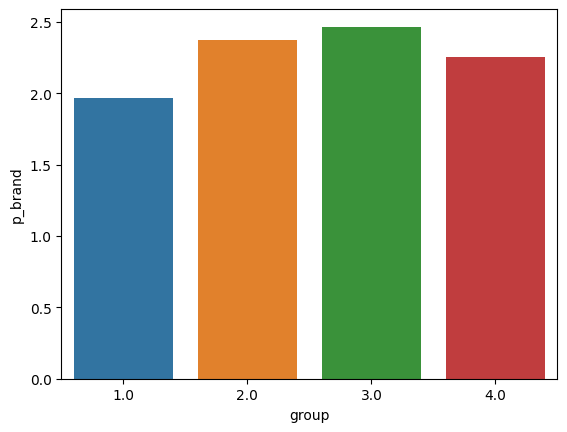

In [17]:
sns.barplot(data = df_bar, x='group', y='p_brand')